# CCM304M133 - Visão Computacional e Processamento de Imagens

## Projeto Fase 3 - Relatório

### Aluno: Wedeueis Braz


## Problema: Detecção de objetos em movimento em vídeo

Dada uma stream de vídeo usar técnicas de processamento de imagens para detectar objetos em movimento segmentando-os do plano de fundo e selecionando potenciais objetos de interesse.
A solução poderá ser utilizada em vídeos de segurança para acionar a gravação da cena ou em vídeos de "homecare", onde o monitoramento de vulneráveis poderá alertar sobre situações de emergência.
As técnicas utilizadas serão as vistas em sala de aula acrescidas de técnicas específicas para vídeos enquanto sequencias de imagens.

## Dados

Dataset de teste para problemas de extração e modelagem de plano de fundo obtido em 
www.svcl.ucsd.edu/projects/background_subtraction/ucsdbgsub_dataset.htm.

O projeto faz uso de videos com camera fixa de pedestres e veiculos em transito, 
simulando uma camera de segurança em situação real.

#### Exemplos de imagens:

Dataset de Pedestres:
Imagens .jpg em nível de cinza de 232 x 152 pixels.
    

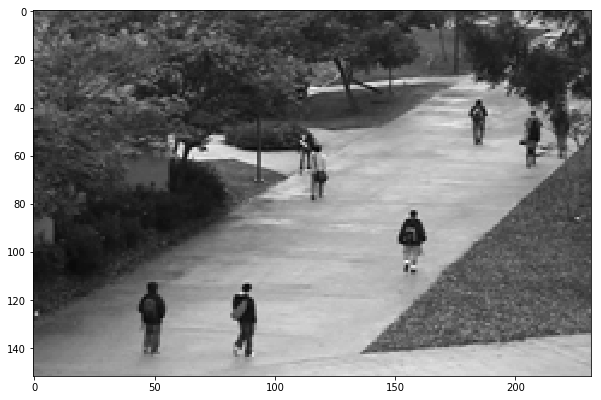

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

def showfig(image, ucmap='gray', size=10):
    plt.figure(figsize=(size,size))
    imgplot=plt.imshow(image, ucmap)

img = cv2.imread("peds/frame_1.jpg", 0)

showfig(img)

Para facilitar o uso do dataset tranformamos a coleção de frames disponível em 
um video em formato .avi usando a função "convert_frames_to_video"

In [18]:
from os.path import isfile, join
 
def convert_frames_to_video(pathIn,pathOut,fps):
    frame_array = []
    files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
 
    #for sorting the file names properly
    files.sort(key = lambda x: int(x[6:-4]))
 
    for i in range(len(files)):
        filename=pathIn + files[i]
        #reading each files
        img = cv2.imread(filename)
        height, width, layers = img.shape
        size = (width,height)
        print(filename)
        #inserting the frames into an image array
        frame_array.append(img)
 
    out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
 
    for i in range(len(frame_array)):
        # writing to a image array
        out.write(frame_array[i])
    out.release()
    
pathIn= './peds/'
pathOut = './peds/video.avi'
fps = 25.0
convert_frames_to_video(pathIn, pathOut, fps)

./peds/frame_1.jpg
./peds/frame_2.jpg
./peds/frame_3.jpg
./peds/frame_4.jpg
./peds/frame_5.jpg
./peds/frame_6.jpg
./peds/frame_7.jpg
./peds/frame_8.jpg
./peds/frame_9.jpg
./peds/frame_10.jpg
./peds/frame_11.jpg
./peds/frame_12.jpg
./peds/frame_13.jpg
./peds/frame_14.jpg
./peds/frame_15.jpg
./peds/frame_16.jpg
./peds/frame_17.jpg
./peds/frame_18.jpg
./peds/frame_19.jpg
./peds/frame_20.jpg
./peds/frame_21.jpg
./peds/frame_22.jpg
./peds/frame_23.jpg
./peds/frame_24.jpg
./peds/frame_25.jpg
./peds/frame_26.jpg
./peds/frame_27.jpg
./peds/frame_28.jpg
./peds/frame_29.jpg
./peds/frame_30.jpg
./peds/frame_31.jpg
./peds/frame_32.jpg
./peds/frame_33.jpg
./peds/frame_34.jpg
./peds/frame_35.jpg
./peds/frame_36.jpg
./peds/frame_37.jpg
./peds/frame_38.jpg
./peds/frame_39.jpg
./peds/frame_40.jpg
./peds/frame_41.jpg
./peds/frame_42.jpg
./peds/frame_43.jpg
./peds/frame_44.jpg
./peds/frame_45.jpg
./peds/frame_46.jpg
./peds/frame_47.jpg
./peds/frame_48.jpg
./peds/frame_49.jpg
./peds/frame_50.jpg
./peds/fr

## Extração de Plano de Fundo

Técnica que consiste na separação dos objetos dinâmicos (em movimento) dos objetos estáticos em uma sequência de imagens temporalmente correlacionadas. O principal desafio é criar uma forma de detecção que seja robusta à variações de iluminação e eficiente do ponto de vista computacional. 
Geralmente os algoritmos proposto se baseam na criação de um modelo de plano de fundo, baseado nos frames vistos anteriormente, o qual será usado para comparação com o frame observado. Dessa forma seguem o seguinte pipeline:
    - Inicialização do modelo de plano de fundo até um certo limiar
    - Manutenção do modelo de plano de fundo
    - Detecção dos objetos em primeiro plano

#### Biblioteca BGS

O OpenCV apresenta hoje apenas dois algoritmo para extração de plano de fundo nativamente, as outras opções que apresentava em versões anteriores foram movidas para a extenção da biblioteca conhecida como "Contrib", por essa razão optou-se pelo uso de implementações suplementares disponíveis em https://github.com/andrewssobral/bgslibrary implementadas pelo pesquisador Andrew Sobral e disponibilizada gratuitamente para uso academico e comercial.
As implementações estão na forma de um framework sobre o OpenCV com uma API relativamente simples e homogênea para os diversos algoritmos. 
A biblioteca disponibilza hoje 43 implementações de algoritmos e a forma mais simples de usá-la é incluí-la em projeto OpenCV em C++, portanto o código do projeto implementado em C++ está incluido em anexo. 



## Resultados

#### Frame de referencia

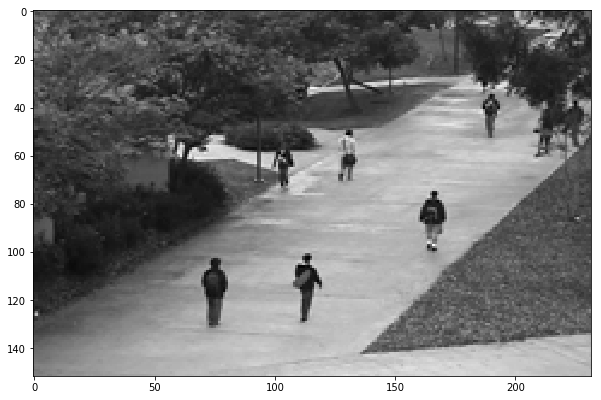

In [6]:
img1 = plt.imread("results/frame_23.jpg")
showfig(img1)

#### Algoritmo do OpenCV

Objetos encontrados com o algoritmo do OpenCV baseado em mistura de gaussianas (MOG2)

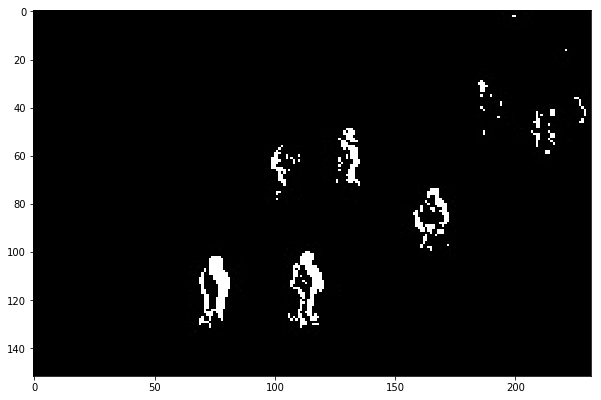

In [8]:
img1 = plt.imread("results/foreground_opencv.jpg")
showfig(img1)

#### Algoritmo BGS FrameDiference

Algoritmo simples baseado na diferença direta entre os frames

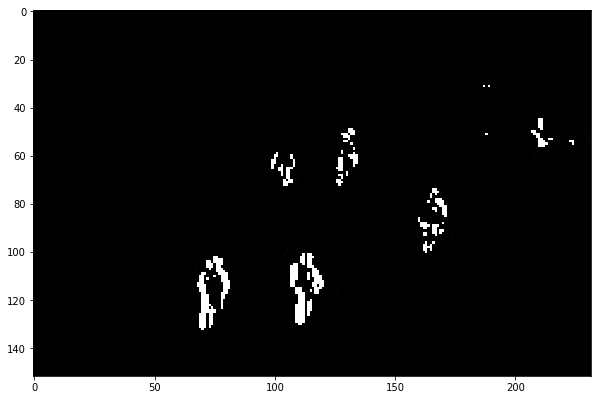

In [9]:
img1 = plt.imread("results/foreground_framediff.jpg")
showfig(img1)

#### Algoritmo BGS LBMOG

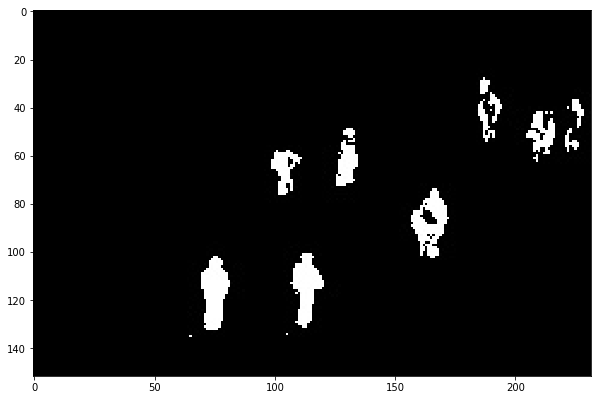

In [10]:
img1 = plt.imread("results/foreground_lbmog.jpg")
showfig(img1)

## Rastreador de objetos

Baseando-se nos objetos encontrados pelo algoritmo LBMOG da biblioteca BGS foi implementado um rastreador de objetos em movimento em C++ que segue o seguinte pipeline.

    - Obter um frame da camera ou vídeo
    - Suavizar ruidos do frame com um filtro gaussiano
    - Aplicar a subtração de plano de fundo para obter uma mascara do primeiro plano
    - Diminuir ruidos e fechar buracos na mascara com morfologia matemática
    - Encontrar contornos na mascara
    - Selecionar os contornos que atendam criterios de interesse
    - Criar "retangulos delimitadores" para os contornos
    - Mostrar os resultados

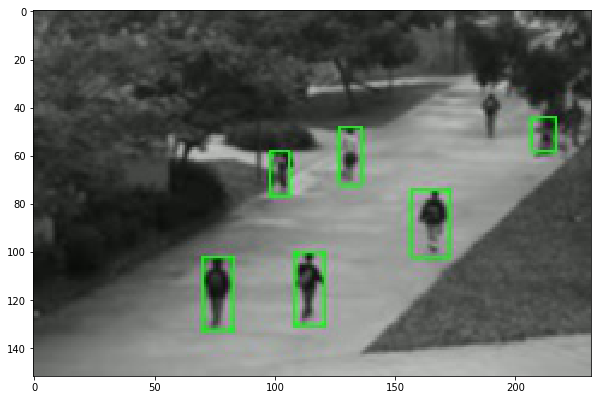

In [13]:
img1 = plt.imread("results/trackers.jpg")
showfig(img1)

## Conclusão

A extração de plano de fundo pode ser uma técnica no inicio do processamento muito útil em diversas aplicações. A disponibilidade de uma biblioteca diversa, prática e gratuita como a BGS é muito interessante para o campo de Visão Computacional e este trabalho procura apresentar uma forma simples de utilizá-la em um contexto de vigilância. 
A aplicação de rastreamento pode ser extendida de varias maneiras, incluindo formas mais robustas de manter o rastreamento, classificação dos objetos encontrados, contagem, "triggers" em regiões de interesse, entre outras.